# SI 618 - Homework #6: Machine Learning 1

Version 2023.11.01.1.CT

In this homework exercise you will apply the machine learning techniques we've covered so far: 
machine learning pipelines, dimension reduction, and clustering.

You will be using the [customer personality analysis dataset](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis) from Kaggle.

**NOTE:** This is a fairly involved homework assignment and we *strongly* urge you to not leave this to the last minute.
We suggest that you try to work on this assignment over several days.

A reminder (from the syllabus):
> Unless stated otherwise in an assignment, you are permitted to use generative AI (e.g. ChatGPT, Copilot, etc.) but you must indicate  that you did so in the work that you submit.  **If you fail to 
>  disclose your use of generative AI you will receive a grade of
> zero on the assignment**.

### The total score for this assignment will be 100 points, consisting of:
- 10 pt: Overall quality of spelling, grammar, punctuation, etc. of written sentences. ([Guide](https://drive.google.com/file/d/1L0P7xJwjUGBvyb49mL3dw1Bt7hzRTiTl/view ))
- 10 pt: Code is written in [PEP 8](https://www.python.org/dev/peps/pep-0008/) style.
- 80 pt: Homework questions. 

In [1]:
MY_UNIQNAME = 'aryanraj' # fill this in with your uniqname

## Task 1 (10 points):
Perform exploratory data analyses on the variables in this dataset.  Your work should include both
numerical **and** graphical overviews of the data.  Explain your findings.  

In [2]:
# Importing all the necessary libraries

import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn import metrics


%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../data/marketing_campaign.csv', sep='\t')

In [4]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [5]:
df.shape

(2240, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [7]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [8]:
df.isna().any()

ID                     False
Year_Birth             False
Education              False
Marital_Status         False
Income                  True
Kidhome                False
Teenhome               False
Dt_Customer            False
Recency                False
MntWines               False
MntFruits              False
MntMeatProducts        False
MntFishProducts        False
MntSweetProducts       False
MntGoldProds           False
NumDealsPurchases      False
NumWebPurchases        False
NumCatalogPurchases    False
NumStorePurchases      False
NumWebVisitsMonth      False
AcceptedCmp3           False
AcceptedCmp4           False
AcceptedCmp5           False
AcceptedCmp1           False
AcceptedCmp2           False
Complain               False
Z_CostContact          False
Z_Revenue              False
Response               False
dtype: bool

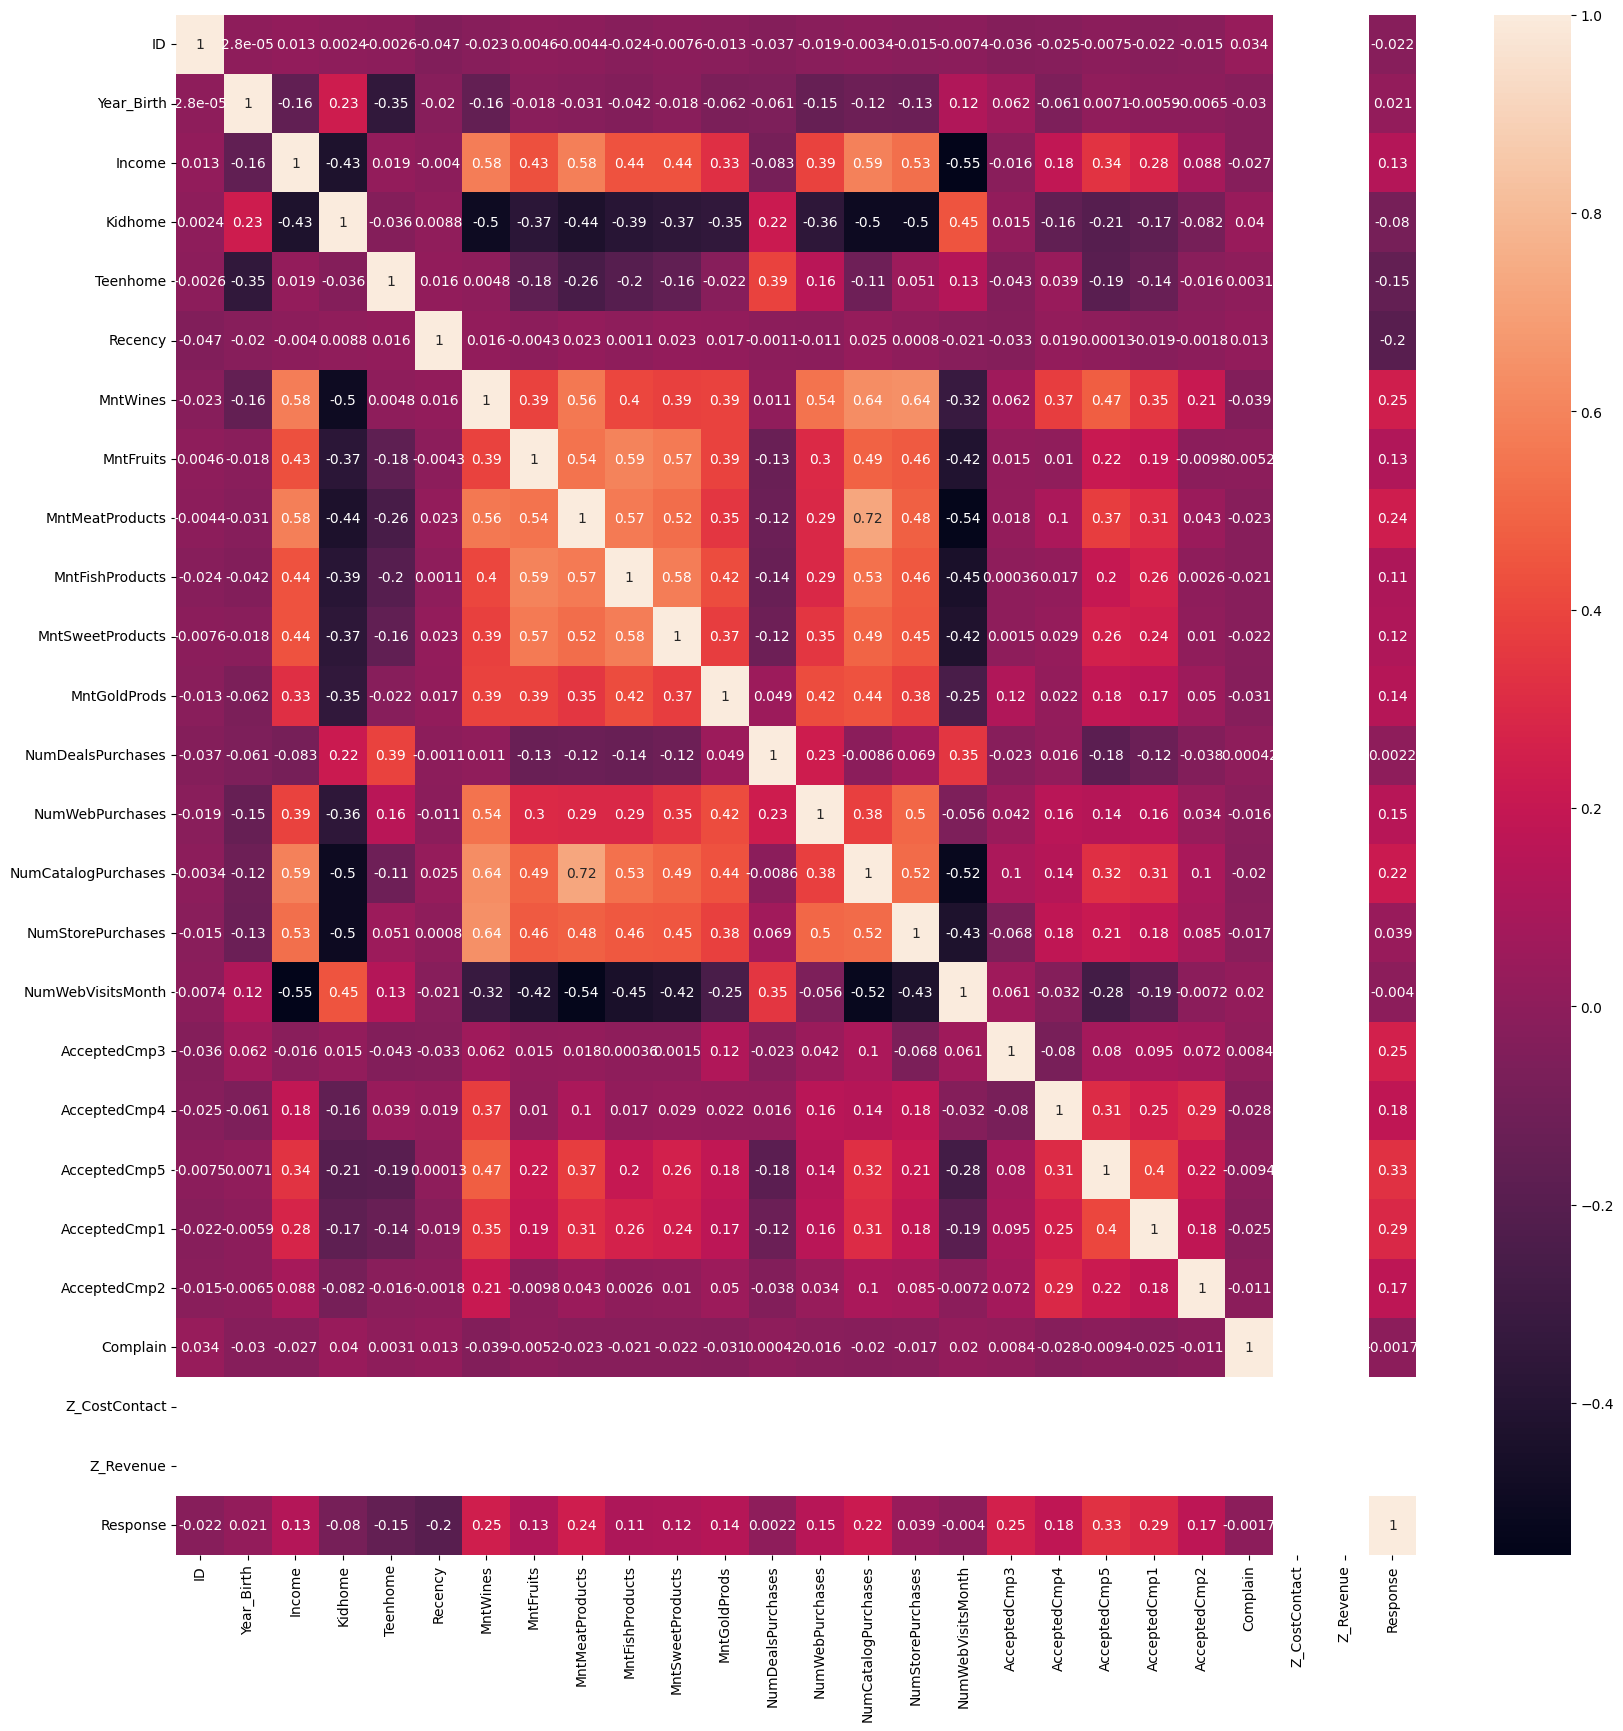

In [9]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(numeric_only=True), annot=True)
plt.show()

EDA performed:
- Checking the shape of the dataset
- Finding the basic information regarding dataset
- Finding the number of unique values present in each column
- Checking if any `NaN` is present in column or not
- Finding the correlation between the feature column

Insert your explanations and interpretations here. You may use multiple cells if you wish.

## Task 2 (1 point): Drop all columns that have constant values.

In [10]:
df=df.drop(columns=["Z_CostContact", "Z_Revenue"],axis=1)

## Task 3 (1 point):
Create a new variable `In_Relationship` whose value is 1 if the value of `Marital_Status` is "Married" or "Together" and 0 otherwise.  Drop the `Marital_Status` column.

In [11]:
df['In_Relationship'] = df['Marital_Status'].apply(lambda x: 1 if x in ['Married', 'Together'] else 0)
df.drop('Marital_Status', axis=1, inplace=True)

## Task 4 (3 points):
Impute missing income values with the median income.  Explain your results (i.e. what the median value was, how many values were imputed, how reliable you think the median value is, etc.).

In [12]:
# Check the number of missing values in 'Income'
missing_income_before = df['Income'].isna().sum()
print(f"Number of missing 'Income' values before imputation: {missing_income_before}")

# Calculate the median income
median_income = df['Income'].median()
print(f"Median 'Income': {median_income}")

# Impute missing 'Income' values with the median income
df['Income'].fillna(median_income, inplace=True)

# Check the number of missing values in 'Income' after imputation
missing_income_after = df['Income'].isna().sum()
print(f"Number of missing 'Income' values after imputation: {missing_income_after}")

Number of missing 'Income' values before imputation: 24
Median 'Income': 51381.5
Number of missing 'Income' values after imputation: 0


Using the median value for imputation is a common tactic since the median is less sensitive to outliers than the mean. Therefore, it might give a more reliable central tendency estimate for 'Income'. However, this method isn't perfect: it reduces variance in the income data and might introduce some bias, especially if the number of missing values is significant.

## Task 5 (15 points):
Use scikit-learn to conduct a linear regression that models the amount spend on wine (`MntWines`) based on `Income` and whether they are in a relationship (`In_Relationship`).  Assess how good your model is by reporting the root mean squared error (RMSE) using the test dataset from an 80-20 train-test-split of the original dataset. Explain what your value of RMSE means, and comment on how good you think your model is based on the RMSE value means.

In [13]:
# Set the predictor and target variables
X = df[['Income', 'In_Relationship']]
y = df['MntWines']

# Split the dataset into a training set and a test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions using the test data
y_pred = model.predict(X_test)

# Calculate the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 263.61704688252837


The Root Mean Squared Error (RMSE) is a measure of how well the model can make predictions. Essentially, an RMSE of 263.636 means that the prediction error of your model (the difference between the predicted and the actual value) is, on average, about 263.636 units in terms of the amount spent on wine (MntWines) per customer. 

Whether this is "good" or "bad" depends on the scale of MntWines. If, for example, the MntWines values ranged from 0 to 5000, an average error of 263.636 may be acceptable. However, if the values only ranged from 0 to 500, then an average error of 263.636 is quite large relatively and indicates that the model is not performing well in predicting the MntWines spending.

Thhere is an inherent limitation of using RMSE as the sole performance metric. By squaring the errors, RMSE tends to penalize larger errors more severely than the smaller ones. Depending upon the problem at hand, sometimes other metrics (such as MAE- Mean Absolute Error) might be more appropriate to use, or you could look at plots of predicted vs actual values to get a visual sense of how well the model is performing.

## Task 6 (20 points):
Conduct an agglomerative clustering analysis to find 4 clusters using average linkage based on PCA projections of the original data onto 5 dimensions (use one-hot encoding on your categorical variables, and remember to scale your data before doing the PCA).  Report the percentage of variance retained in the first 5 principal components. 

Do not create a dendrogram. Instead, create a scatterplot of the first two principal components, colored by cluster membership.  Comment on the results of your clustering analysis.

Repeat the above steps using 7 clusters.  Compare the results to the 4 cluster solution.  Which solution do you prefer and why?

Keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Variance of each component: [0.00998397 0.00377901 0.003511   0.00308977 0.00280949]

 Total Variance Explained: 2.32
[1 1 1 ... 1 1 1]


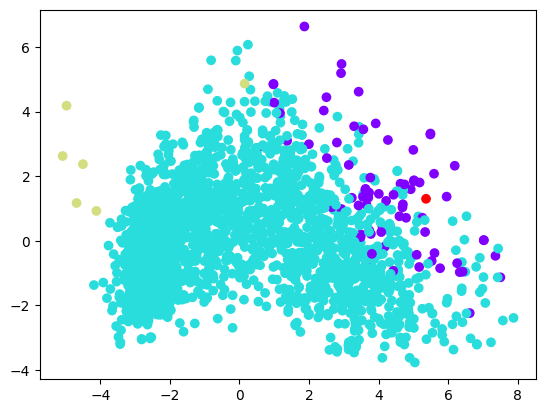

In [14]:
# One-hot encode categorical variables
df = pd.get_dummies(df)

# Scale your data
scaler = StandardScaler()
scaled_df = scaler.fit_transform(df)

# Perform PCA
pca = PCA(n_components=5)
principalComponents = pca.fit_transform(scaled_df)

# Print the percentage of variance retained in the first 5 principal components
print('Variance of each component:', pca.explained_variance_ratio_)
print('\n Total Variance Explained:', round(sum(list(pca.explained_variance_ratio_))*100, 2))

# Conduct agglomerative clustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
print(cluster.fit_predict(principalComponents))

plt.scatter(principalComponents[:,0],principalComponents[:,1], c=cluster.labels_, cmap='rainbow')

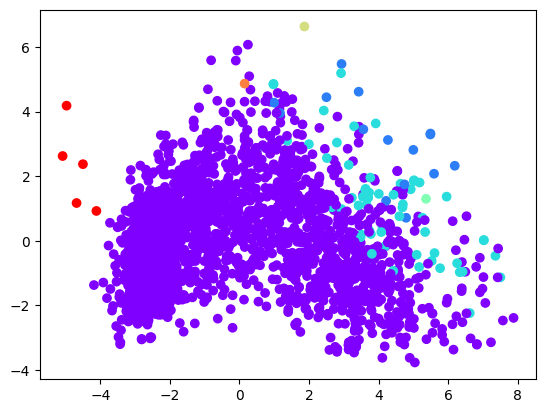

In [15]:
# Conduct agglomerative clustering with 7 clusters
cluster = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
cluster.fit_predict(principalComponents)

plt.scatter(principalComponents[:,0],principalComponents[:,1], c=cluster.labels_, cmap='rainbow')

In [16]:
# Conduct agglomerative clustering with 7 clusters
cluster7 = AgglomerativeClustering(n_clusters=7, affinity='euclidean', linkage='average')
labels7 = cluster7.fit_predict(principalComponents)

# Conduct agglomerative clustering with 4 clusters
cluster4 = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='average')
labels4 = cluster4.fit_predict(principalComponents)

# Calculate silhouette scores
silhouette_score7 = metrics.silhouette_score(principalComponents, labels7, metric='euclidean')
silhouette_score4 = metrics.silhouette_score(principalComponents, labels4, metric='euclidean')

print('Silhouette score for 7 clusters:', silhouette_score7)
print('Silhouette score for 4 clusters:', silhouette_score4)

Silhouette score for 7 clusters: 0.2105605826449567
Silhouette score for 4 clusters: 0.2577272039718088


Insert your explanations and interpretations here.

## Task 7 (20 points):
Conduct a k-means clustering of the data.  Pre-process the data using a 5-dimensional PCA (use one-hot encoding on your categorical values and remember to scale your data before doing the PCA). Use the average silhouette score to determine the optimal number of clusters and show the silhouette plot for the clustering solution using the optimal number of clusters.

Again, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster? (Hint: a groupby() by cluster membership might be helpful here.)

Compare the results to the agglomerative clustering you did in the previous task.  Which solution do you prefer and why?

In [17]:
# insert your code here

Insert your explanations and interpretations here.

## Task 8 (10 points):
Show the results of a t-SNE analysis of the dataset.  Experiment with a variety of perplexity values and explain your final choice.  As with the previous questions, keep in mind that one of the goals of cluster analysis with this dataset is creating customer segments.  Can you define customer segments by examining the characteristics of each cluster?  How might you label the points in the t-SNE plot to show characteristics of each cluster?

In [18]:
# insert your code here

Insert your explanations and interpretations here.

# NOTE
We **strongly** recommend restarting your kernel and running your complete notebook from top to bottom
before submitting your work to Canvas in both HTML and IPYNB formats.